In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
from sklearn.datasets import load_iris
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indic

In [2]:
class Perceptron_class(object):
    """Implements a perceptron network"""
    def __init__(self, input_size, lr=1, epochs=100):
        self.W = np.zeros(input_size+1)
        # add one for bias
        self.epochs = epochs
        self.lr = lr
    
    def activation_fn(self, x):
        #return (x >= 0).astype(np.float32)
        return 1 if x >= 0 else 0
 
    def predict(self, x):
        z = self.W.T.dot(x)
        a = self.activation_fn(z)
        return a
 
    def fit(self, X, d):
        for _ in range(self.epochs):
            for i in range(d.shape[0]):
                x = np.insert(X[i], 0, 1)
                y = self.predict(x)
                e = d[i] - y
                self.W = self.W + self.lr * e * x

In [22]:
X = load_iris()
print(X)
index_row=[]
for i in range(X.data.shape[0]):
    if X.target[i]==2 or X.target[i]==1:
        index_row.append(i)
d = X['target'][index_row]
data=X.data[index_row]
perceptron = Perceptron_class(input_size=2)
perceptron.fit(data[:,[2,3]], d)
print(perceptron.W)


{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data, d, test_size=0.3)

In [5]:
sc = StandardScaler()
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [6]:
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [7]:
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      max_iter=None, n_iter=40, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [8]:
y_pred = ppn.predict(X_test_std)

In [9]:
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 1.00


In [10]:
filename = 'prepd-data-20y.csv'
data = pd.read_csv(filename)
data.head(10)

,Unnamed: 0,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal,Region
0,1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None,China
1,4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,None,China
2,5,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 4 x 200 metres Freestyle Relay,None,China
3,14,4639,Ao Changrong,M,25.0,173.0,71.0,China,CHN,2008,Summer,Beijing,Hockey,Hockey Men's Hockey,None,China
4,16,6376,Ba Dexin,M,23.0,185.0,80.0,China,CHN,2014,Winter,Sochi,Curling,Curling Men's Curling,None,China
5,20,6847,Bai Anqi,F,19.0,164.0,59.0,China,CHN,2012,Summer,London,Swimming,Swimming Women's 200 metres Backstroke,None,China
6,22,6849,Bai Faquan,M,26.0,173.0,66.0,China,CHN,2012,Summer,London,Triathlon,Triathlon Men's Olympic Distance,None,China
7,23,6849,Bai Faquan,M,30.0,173.0,66.0,China,CHN,2016,Summer,Rio de Janeiro,Triathlon,Triathlon Men's Olympic Distance,None,China
8,27,6855,Bai Qiuming,M,19.0,173.0,70.0,China,CHN,2014,Winter,Sochi,Speed Skating,Speed Skating Men's 500 metres,None,China
9,28,6857,Bai Xue,F,19.0,165.0,53.0,China,CHN,2008,Summer,Beijing,Athletics,"Athletics Women's 10,000 metres",None,China


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


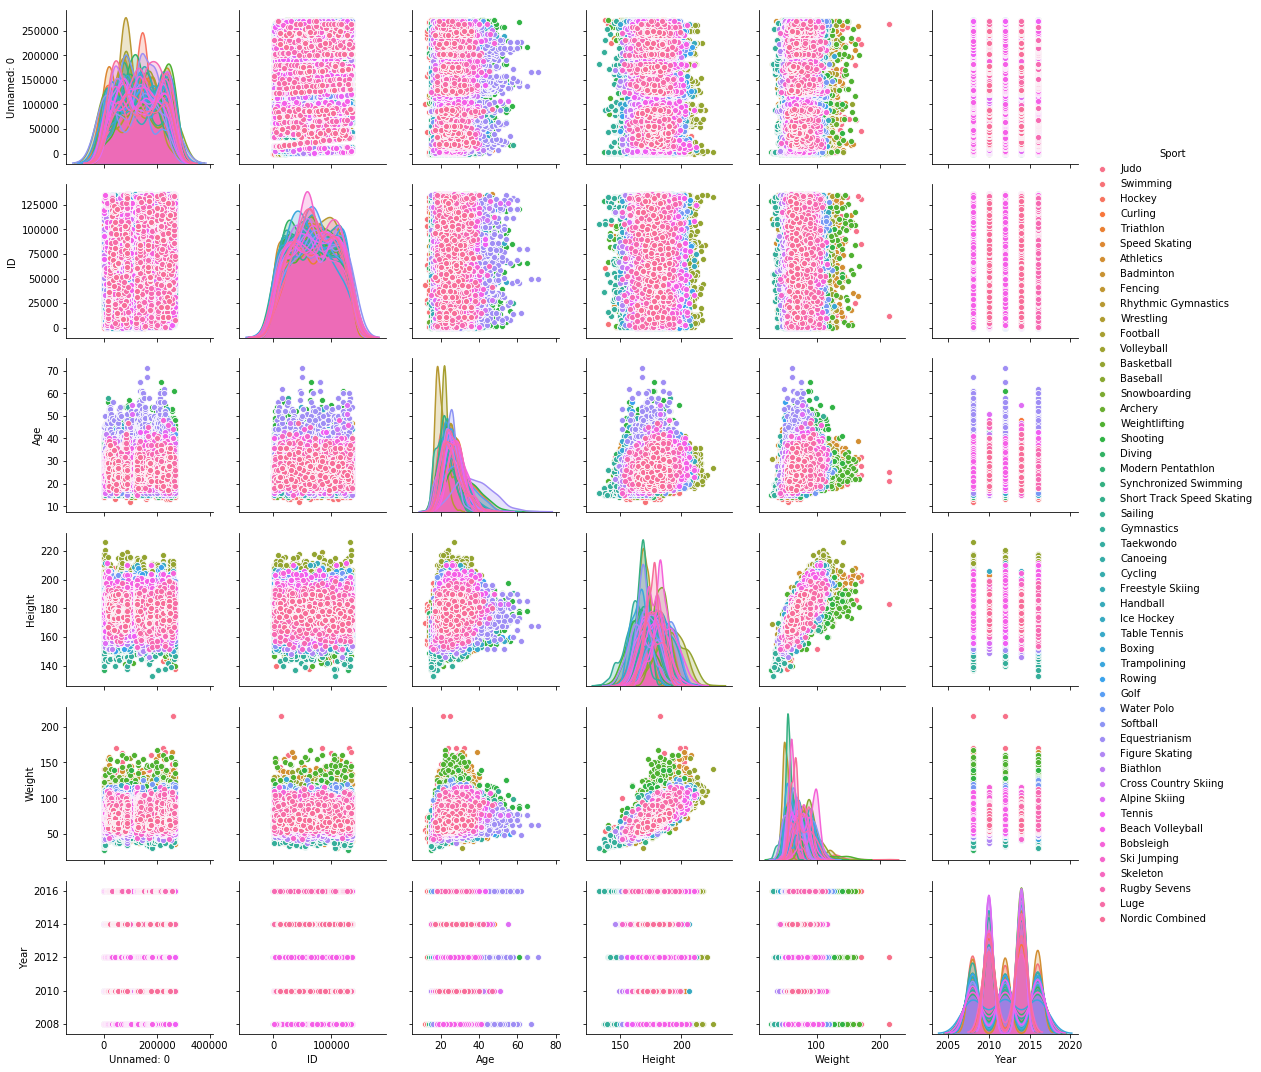

In [11]:
sb.pairplot(data=data, hue='Sport')

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


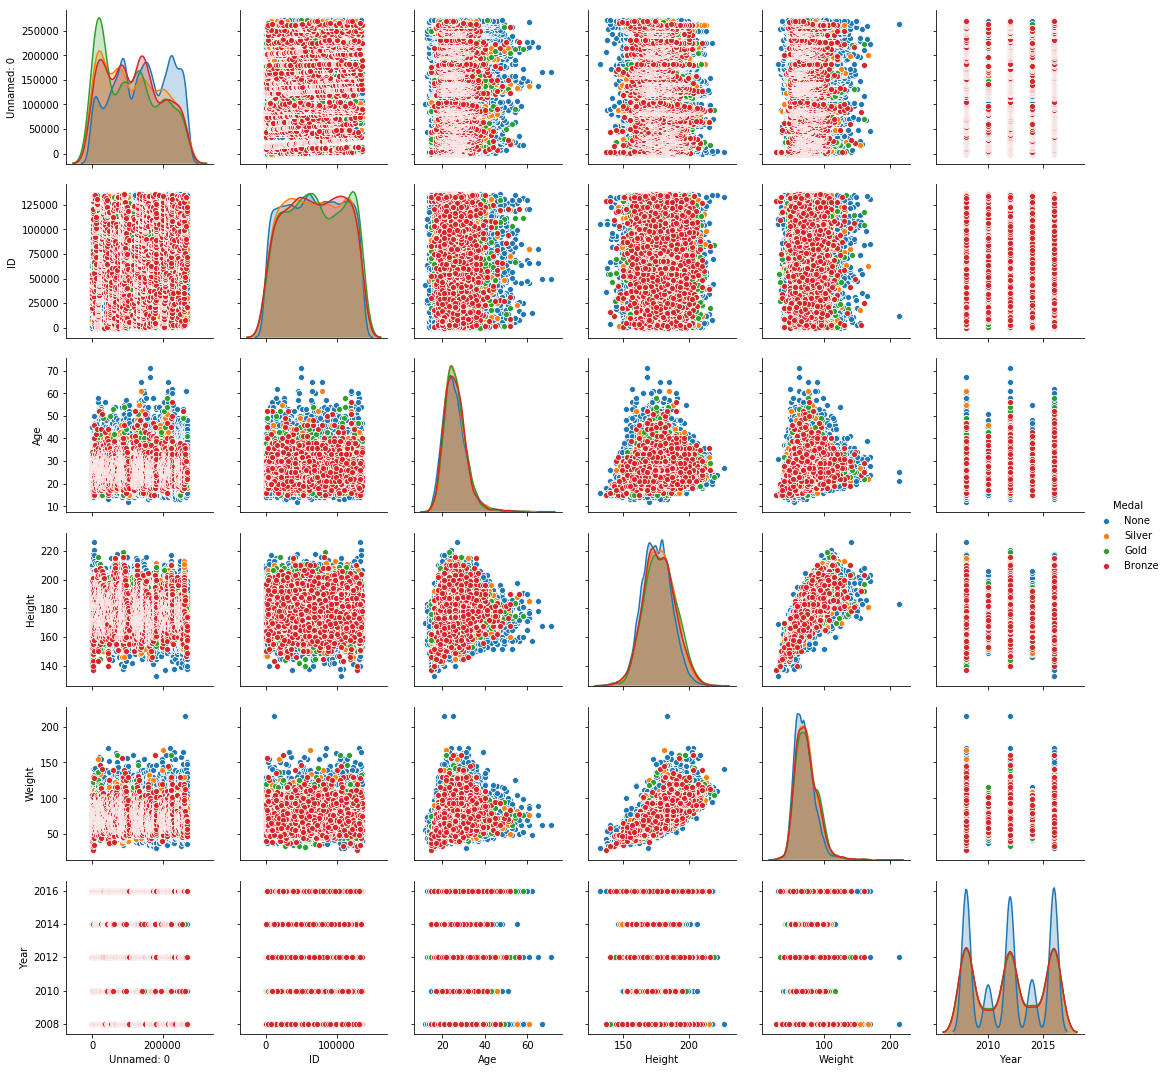

In [12]:
sb.pairplot(data=data, hue='Medal')

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


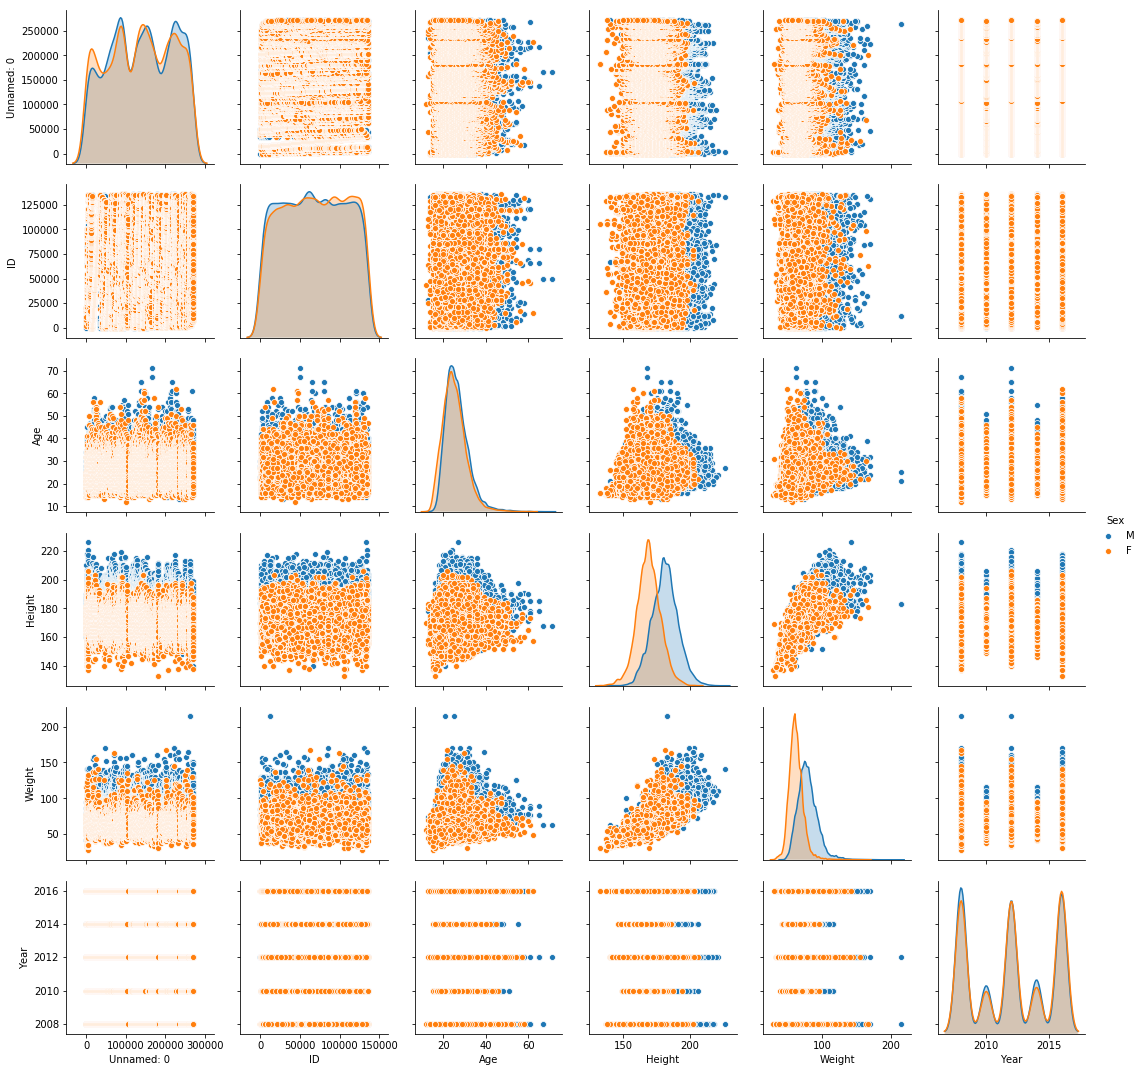

In [13]:
sb.pairplot(data=data, hue='Sex')

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


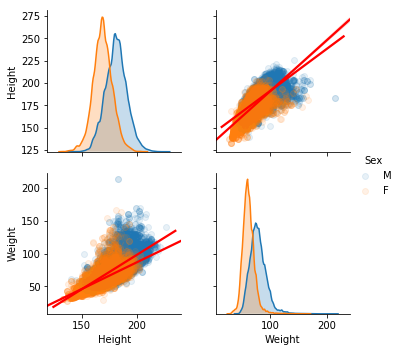

In [14]:
df = data[['Height', 'Weight', 'Sex']]
sb.pairplot(data=df, hue='Sex', kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


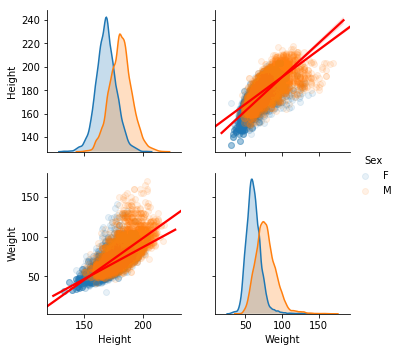

In [15]:
df = data.loc[(data['Year'].isin([2014, 2016])), ['Height', 'Weight', 'Sex']]
sb.pairplot(data=df, hue='Sex', kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


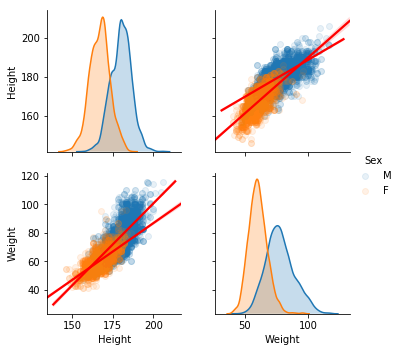

In [16]:
df = data.loc[(data['Year']==2014), ['Height', 'Weight', 'Sex']]
sb.pairplot(data=df, hue='Sex', kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})

In [17]:
X = df
y = df['Sex']
print(y)

4        M
8        M
24       F
52       M
53       M
135      F
210      F
211      F
212      F
326      M
327      M
328      M
329      M
414      F
415      F
452      M
510      F
532      F
533      F
534      F
535      F
536      F
540      F
541      F
542      F
543      F
578      F
587      F
596      F
661      F
        ..
48400    M
48406    M
48412    F
48413    F
48415    M
48489    M
48490    M
48614    M
48757    M
48758    M
48880    M
48919    M
48920    M
48991    M
48992    M
48993    M
48997    F
49008    M
49009    M
49013    M
49031    M
49032    M
49039    F
49040    M
49041    M
49054    F
49068    M
49069    M
49191    F
49192    F
Name: Sex, Length: 4891, dtype: object


In [18]:
le = []
ley = LabelEncoder()
ley.fit(y)
x = X.values[:,[0,1]]

for i in range(x.shape[1]):
    le.append(LabelEncoder())
    
for i in range(x.shape[1]):
    le[i].fit(x[:,i])
    x[:,i] = le[i].transform(x[:,i])
    
y = ley.transform(y)
print(y)
print(X.columns.values[[0,1,2]])

[1 1 0 ... 1 0 0]
['Height' 'Weight' 'Sex']


In [19]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
ppn = Perceptron(n_iter=10000, eta0=0.1, random_state=0)
ppn.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      max_iter=None, n_iter=10000, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [2]:
y_pred = ppn.predict(X_test)

NameError: name 'ppn' is not defined